# ====================================================================================
# Classifying Personal Income
# ====================================================================================

## Packages importing

In [1]:
# # Intel Extension for scikit-learn
# from sklearnex import patch_sklearn
# patch_sklearn()

In [2]:
# To work with DataFrames
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sb

# To partition the data
from sklearn.model_selection import train_test_split

# For preprocessing data (Standarization of data)
from sklearn.preprocessing import StandardScaler

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing Data

In [3]:
data_income = pd.read_csv('income.csv')                                         #,na_values=[" ?"]) 
  
# Creating a copy of original data                                                                              # Additional strings (" ?") to recognize as NA
data = data_income.copy()

# Data Cleaning

## Exploratory Data Analysis

1. Getting to know the data
2. Data preprocessing (Missing Values)
3. Cross tables and Data Visualization

### 1. Getting to know data

In [4]:
#**** To check variables' data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [5]:
#**** Check for missing values             
data.isnull().sum()
#**** No missing values !

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [6]:
#**** Summary of numerical variables
summary_num = data.describe()
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
#**** Summary of categorical variables
summary_cate = data.describe(include = "object")    # We can use "O" as well instead of "object"
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [8]:
#**** Frequency of each categories
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [9]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
np.unique(data.JobType)    # Notice the space before each data column

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [11]:
"""
Go back and read the data by including "na_values[' ?']" to consider ' ?' as nan !!!
"""
data = pd.read_csv('income.csv',na_values=[" ?"])    # Notice the space before the "?"

### 2. Data preprocessing (Missing values)

In [12]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [13]:
missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least 1 column value is missing in a row

In [14]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 8 to 31968
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1816 non-null   int64 
 1   JobType        7 non-null      object
 2   EdType         1816 non-null   object
 3   maritalstatus  1816 non-null   object
 4   occupation     0 non-null      object
 5   relationship   1816 non-null   object
 6   race           1816 non-null   object
 7   gender         1816 non-null   object
 8   capitalgain    1816 non-null   int64 
 9   capitalloss    1816 non-null   int64 
 10  hoursperweek   1816 non-null   int64 
 11  nativecountry  1816 non-null   object
 12  SalStat        1816 non-null   object
dtypes: int64(4), object(9)
memory usage: 198.6+ KB


Those 1816 are 'non-null' values

#### Points to note:
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked

In [15]:
# Here we're dropping the rows that contain the missing values
data2 = data.dropna(axis=0)           # axis=0 or 'index' means dropping rows, axis=1 or 'columns' means dropping columns

In [16]:
data3 = data2.copy()

In [17]:
# Realtionship between independent variables
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


- None of the values are correlated

### 3. Cross tables & Data Visualization

In [18]:
# Extracting Column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [19]:
# Gender proportional table
gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [20]:
# Gender vs Salary status
gender_salstat = pd.crosstab(index = data2["gender"],    \
columns = data2['SalStat'], margins = True, normalize =  'index')

gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<AxesSubplot:xlabel='SalStat', ylabel='count'>

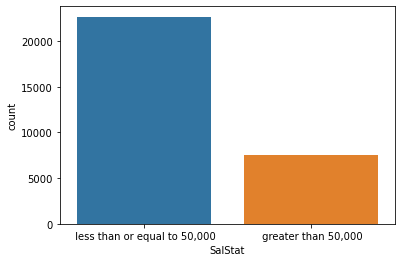

In [21]:
# Frequency distribution of 'Salary status'
# SalStat = 
sb.countplot(x=data2['SalStat'])

- 75 % of people's salary status is <=50,000 
- 25% of people's salary status is > 50,000

<AxesSubplot:xlabel='age', ylabel='Count'>

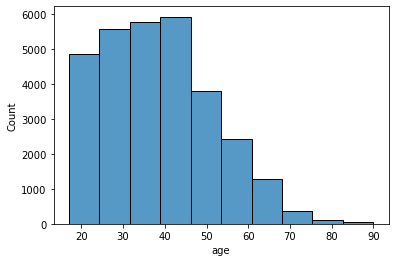

In [22]:
##############  Histogram of Age  #############################
sb.histplot(data2['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

<AxesSubplot:xlabel='SalStat', ylabel='age'>

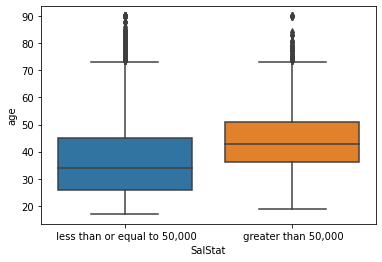

In [23]:
############# Box Plot - Age vs Salary status #################
sb.boxplot(x='SalStat', y='age', data=data2)

In [24]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

- people with 35-50 age are more likely to earn > 50000 USD p.a
- people with 25-35 age are more likely to earn <= 50000 USD p.a

#### Realtion of SalSat with other variables

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


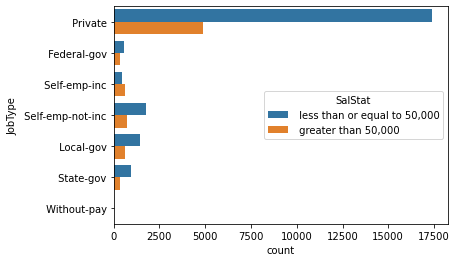

In [25]:
#*** Jobtype
JobType     = sb.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


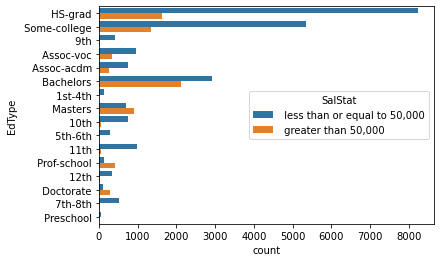

In [26]:
#*** Education
Education   = sb.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


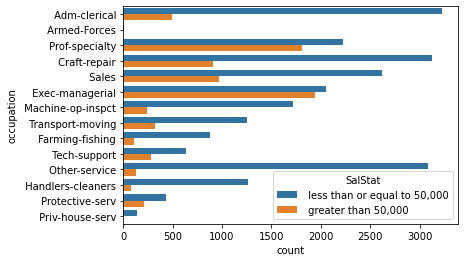

In [27]:
#*** Occupation
Occupation  = sb.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

Try to match with the model prediction

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

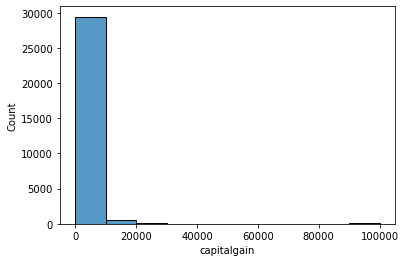

In [28]:
#*** Capital gain
sb.histplot(data2['capitalgain'], bins = 10, kde = False)

In [29]:
data2.capitalgain.value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1455         1
4931         1
22040        1
401          1
1086         1
Name: capitalgain, Length: 118, dtype: int64

<AxesSubplot:xlabel='capitalloss', ylabel='Count'>

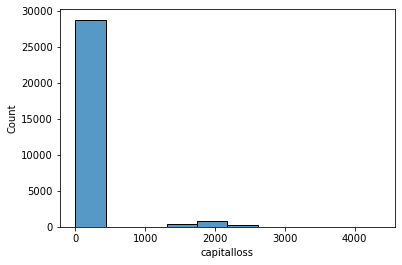

In [30]:
sb.histplot(data2['capitalloss'], bins = 10, kde = False)

In [31]:
data2.capitalloss.value_counts()[0]

28735

`palette`; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

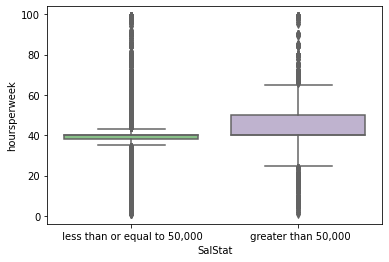

In [32]:
sb.boxplot(x=data2.SalStat, y=data2.hoursperweek, palette='Accent')

# LOGISTIC REGRESSION

Creating the Machine Learning Model

## Indexing numerically the Output variable

In [33]:
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

## Hot Encoding

In [34]:
# This makes each categorical variable categories to different columns and places 1 where that is the data (This is called hot encoding in Machine Learning context)
new_data=pd.get_dummies(data2, drop_first=True)

In [35]:
data2.shape, new_data.shape

((30162, 13), (30162, 95))

In [36]:
x = new_data.drop(columns='SalStat')
y = new_data.SalStat

## Test, Train Data Split

In [37]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)    # Remember that the x, y don't have the column headers, only the integer data
# test_size = 0.3 means 30% of the data will be reserved for test data
# random_state = 0 means the random_Seed for the random_number_generator, this means that the test data is randomly chosen from the whole dataset

In [356]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((21113, 94), (21113,), (9049, 94), (9049,))

## Standarization

Before training the model with the data, we need to standarize the data, as there are some variables that are having ranges [0,1], whereas some are having [-99999,99999]
(like, the model if trained on this data, will have higher sensitivity on the data having [-99999,99999] range than the [0,1] which would make the model bad, since the coefficients can not be arbitrarily small/large with arbitrarily high precision such that the scaling is not needed)

In [357]:
scaler = StandardScaler()
scaler.fit(train_x)    # To get the standarization factors (we do that from the seen data)

# Now, we scale(map) the data (train and test data)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# We do not need to transform the output y values, since they are either 0 or 1 for the classification problem, we would need to 
#standarize for the Regression problem

## Training Part

In [358]:
# Make an instance of the Model
logistic = LogisticRegression()

In [359]:
# Fitting the values for x and y (i.e. Training)
logistic.fit(train_x,train_y)

LogisticRegression()

In [360]:
logistic.coef_

array([[ 0.33569547,  2.45554172,  0.26476642,  0.33345192, -0.18462227,
        -0.21324243, -0.05202356, -0.27355599, -0.14560608, -0.14263338,
         0.04390724,  0.06472699, -0.01142668, -0.04721347, -0.06755777,
        -0.01361571,  0.21704304,  0.27678454,  0.72556264,  0.35563708,
         0.37095057,  0.52791414, -0.50349127,  0.36730586,  0.46136842,
         0.07707693,  1.02838098,  0.02739467, -0.24525569, -0.02816259,
         0.0284794 , -0.0154517 ,  0.00606578,  0.26651237, -0.18034245,
        -0.14852834, -0.07090055, -0.27584261, -0.28467987,  0.16115453,
         0.0716616 ,  0.0713929 ,  0.10535552, -0.03701187,  0.16487578,
        -0.06075279, -0.27634235,  0.11408742,  0.27344028,  0.14044963,
         0.10288087,  0.01082637,  0.17696717,  0.43557917, -0.05972277,
        -0.11599279, -0.15461148, -0.05769667, -0.12134864, -0.05473808,
        -0.12174845, -0.05110587, -0.0267184 , -0.04633623, -0.06440089,
        -0.08489587, -0.05046838, -0.03888116, -0.0

In [361]:
logistic.coef_.shape          # 94 columns

(1, 94)

In [362]:
logistic.intercept_

array([-1.98130319])

- **The model has been built** in 4.2s
  
These coefficient and intercepts are :  
> y = coeff_ * x + intercept  

where coeff and x is rank 1 tensor/vectors, with intercept as rank 0 tensor/scaler

## Model Prediction on test data

In [363]:
# Prediction from test data
prediction = logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Confusion Matrix
This is a measure to check the performance of the classification model

Outputs, no of correct results vs no of incorrect ones
and sums up the values classwise

> The principal diagonal values are total number of correct classification
> The off-diagonal are incorrect classification
>
> - columns are predictions  
> - rows are actual classes

In [364]:
# Confusion matrix
cnfsn_matrix = confusion_matrix(test_y, prediction)
cnfsn_matrix

array([[6318,  505],
       [ 916, 1310]], dtype=int64)

In [365]:
# Calculating the accuracy
acc_score=accuracy_score(test_y, prediction)
acc_score

0.8429660735992928

In [366]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())    # test_y != prediction is a boolean array, and we then sum the True ones

Misclassified samples: 1421


## REMOVING INSIGNIFICANT VARIABLES

We work with data3 here

In [367]:
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data3['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

### The insignificant variables

In [368]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)    # axis =1 means columns

In [369]:
new_data=pd.get_dummies(new_data, drop_first=True)    # hot-encoding

Same steps

In [370]:
x2 = new_data.drop(columns='SalStat')
y2 = new_data.SalStat

In [371]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [372]:
# Standarization
scaler2 = StandardScaler()
scaler2.fit(train_x2)

train_x2 = scaler2.transform(train_x2)
test_x2 = scaler2.transform(test_x2)

In [373]:
# Make an instance of the Model
logistic2 = LogisticRegression()

In [374]:
# Fitting the values for x and y (training - 0.4s this time compared to 0.5s before)
logistic2.fit(train_x2,train_y2)

LogisticRegression()

In [375]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)

In [376]:
# Calculating the accuracy
acc_score2 = accuracy_score(test_y, prediction2)
acc_score2

0.8417504696651563

In [377]:
print('previous accuracy : ', acc_score)

previous accuracy :  0.8429660735992928


In [378]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1432


In [379]:
print('Before : ', (test_y != prediction).sum())

Before :  1421


The accuracy has dropped, but the drop was not significant

# KNN Model

In [380]:
# importing necessary modules
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [381]:
# Creating an instance for the KNN Classifier
KNN_Classifier = KNeighborsClassifier(n_neighbors= 5)

In [382]:
KNN_Classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [383]:
prediction_KNN = KNN_Classifier.predict(test_x)

So, in KNN Classifier method, it doesn't take much time (0.1s) to train the data, rather than predicting the output (12.3s)

In [384]:
cnfsn_matrix_KNN = confusion_matrix(test_y, prediction_KNN)
cnfsn_matrix_KNN

array([[6156,  667],
       [ 942, 1284]], dtype=int64)

In [385]:
acc_score_KNN = accuracy_score(test_y, prediction_KNN)
acc_score_KNN

0.8221902972704166

In [386]:
print('Misclassified samples in KNN Model: %d' % (test_y != prediction_KNN).sum())

Misclassified samples in KNN Model: 1609


In [387]:
print('Misclassified samples in Logistic Regression: %d' % (test_y != prediction).sum())

Misclassified samples in Logistic Regression: 1421


> Looks like the Logistic Regression model worked better wrt KNN Classifier for K=5

In [388]:
"""
Effect of K value on classifier
"""
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [389]:
print(Misclassified_sample)    #standarized

[1944, 1747, 1676, 1633, 1609, 1583, 1587, 1580, 1548, 1570, 1542, 1572, 1542, 1559, 1562, 1562, 1566, 1564, 1560]


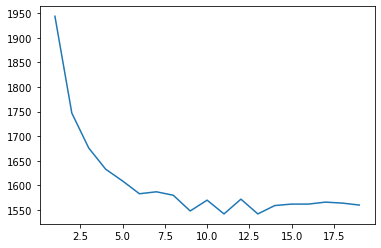

In [390]:
plt.plot(list(range(1,20)), Misclassified_sample)

print(Misclassified_sample)    #not-standarized  
Output: [1766, 1516, 1515, 1436, 1493, 1438, 1451, 1432, 1458, 1436, 1441, 1447, 1451, 1423, 1413, 1390, 1424, 1396, 1434]


> So, the KNN Classifier worked better with non-standarized dataset, this can be explained from the fact that KNN Classifier works in the principle of classfying wrt nearest neighbour, and standarized datasets will be having lesser distances among them, making the predicting class faster, but sometimes there would be more ambiguity of predicting a class due to indistinguishable distance (precision limit)

In [391]:
{'K value' : Misclassified_sample.index(min(Misclassified_sample))+1, 'Missclassified no' : min(Misclassified_sample)}

{'K value': 11, 'Missclassified no': 1542}

In [392]:
K_best = Misclassified_sample.index(min(Misclassified_sample))+1
K_best

11

So, finalizing the best KNN Model on the data:

In [393]:
knn = KNeighborsClassifier(n_neighbors=K_best)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=11)

In [394]:
pred = knn.predict(test_x)

In [395]:
acc_KNN = accuracy_score(test_y, pred)
acc_KNN

0.8295944303237927

In [396]:
cnfsn_matrix_KNN = confusion_matrix(test_y, pred)

In [397]:
'the number of missclassified data : ' + str((test_y != pred).sum())

'the number of missclassified data : 1542'

In [398]:
dict_msclf = {'LogisticRegression': (test_y != prediction).sum(),    \
              'Logistic_lessvar' : (test_y != prediction2).sum(),    \
              'KNN_best': (test_y != pred).sum()}
          
dict_msclf

{'LogisticRegression': 1421, 'Logistic_lessvar': 1432, 'KNN_best': 1542}

In [400]:
dict_acc = {'LogisticRegression': acc_score*100,    \
              'Logistic_lessvar' : acc_score2*100,    \
              'KNN_best': acc_KNN*100}

dict_acc

{'LogisticRegression': 84.29660735992928,
 'Logistic_lessvar': 84.17504696651564,
 'KNN_best': 82.95944303237927}

## Let's check the KNN Model for the reduced variables

In [403]:
"""
Effect of K value on classifier
"""
Misclassified_sample2 = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x2, train_y2)
    pred_i = knn.predict(test_x2)
    Misclassified_sample2.append((test_y2 != pred_i).sum())

> The time it took to create the list is `122.3s` with the dropped variables, whereas for the whole variables, it took `125.1s` (not much improvement in time)

> Now, after using the Intel(R) Patch: 5.7s and 7.5s

(But the caveat is that the model performance decreased!)
> Non-Standarized Data

- Without Patch, the result are
  - All data : {'K value': 16, 'Missclassified no': 1390}
  - Dropped data : {'K value': 11, 'Missclassified no': 1413}
- With Patch:
  - All data : {'K value': 18, 'Missclassified no': 1416}
  - Dropped data : {'K value': 18, 'Missclassified no': 1424}

In [404]:
print(Misclassified_sample2)

[1864, 1726, 1647, 1631, 1614, 1582, 1567, 1570, 1568, 1540, 1549, 1534, 1537, 1518, 1530, 1518, 1542, 1528, 1540]


print(Misclassified_sample2)        # In Non-Standarized data  
Out: [1723, 1512, 1541, 1480, 1490, 1442, 1467, 1433, 1437, 1416, 1413, 1434, 1437, 1445, 1426, 1420, 1438, 1423, 1441]

In [405]:
{'K value' : Misclassified_sample2.index(min(Misclassified_sample2))+1, 'Missclassified no' : min(Misclassified_sample2)}

{'K value': 14, 'Missclassified no': 1518}

In [406]:
dict_msclf

{'LogisticRegression': 1421, 'Logistic_lessvar': 1432, 'KNN_best': 1542}

In [407]:
dict_acc

{'LogisticRegression': 84.29660735992928,
 'Logistic_lessvar': 84.17504696651564,
 'KNN_best': 82.95944303237927}

> Seems like Logistic Regression has performed better at this Classification problem

> Also, considering non-standarized data, KNN worked better